# Logger template

Start by importing the necessary modules (pydvma is a python package written for data acquisition at CUED).

Remember: 
* to actually run a cell of code, click inside the cell then press 'shift+enter'
* the cell is running while [ * ] is displayed
* the cell has finished running when it changes to a number

In [1]:
%gui qt

In [2]:
import pydvma as dvma

Choose your acquisition settings:

* channels=2 (number of channels to record)
* fs=44100 (sampling rate in Hz)
* chunk_size=200 (how many samples to collect at a time, effectively controls refresh rate of oscilloscope)
* stored_time=2 (time in seconds to record data for)
* viewed_time=2 (time in seconds to display on oscilloscope)
* device_index = 1 (Windows default input)

In [29]:
settings = dvma.MySettings(channels=2,
                           fs=44100,
                           chunk_size=1024,
                           stored_time=2,
                           viewed_time=2,
                           device_driver='soundcard')

Now open an oscilloscope using your settings. This shows three plots:

* the top one is like a normal oscilloscope showing the signal (toggle on/off with 'T');
* the middle one shows the frequency spectrum of the signal (toggle on/off with 'F');
* the bottom one shows the signal amplitudes (toggle on/off with 'L');

Try the following:

* **Tap a tuning fork** on your knee or the table, hold it over the microphone, then watch the oscilloscope window. You should see a signal in the time-domain plot (top), and a sharp peak in the frequency-domain plot (middle) at the tuning fork's natural frequency.
* **Whistle at the microphone** and change pitch: you should see a peak which moves with the changing frequency.
* **Place the beam on the rubber band supports** (so it's suspended over the microphone) and tap the beam while watching oscilloscope window. You will see the signal pass through the time-domain view, and clear peaks in the frequency domain view.

In [30]:
osc = dvma.Oscilloscope(settings)

Number of devices available is: 7

Devices available, by index:

0 Microsoft Sound Mapper - Input
1 Microphone Array (Realtek High 
2 Line 1 (Virtual Audio Cable)
3 Microsoft Sound Mapper - Output
4 Speakers (2- Logitech BT Adapte
5 Speakers (Realtek High Definiti
6 Line 1 (Virtual Audio Cable)

Default device is: 1 Microphone Array (Realtek High 

Insert index of required device:1
1 Microphone Array (Realtek High 
Selected device: 1 : Microphone Array (Realtek High 


Press the **space bar** to record data from the past 'stored_time' seconds.

* The first time you press it you will be prompted for where to save your data.
* Use the save dialog to navigate to where you want to save your data
* Subsequent times you press it will auto-save to the same folder with a number added to the filename.
* Press 's' if you want to save data to a new filename or location. Pressing space after that will auto-save with the new name.

If needed then you can restart this notebook using the 'kernel' menu and select 'restart kernel and clear output'. You can then run the import section above and start again from the top, or jump to the dvma.read_data() section below.

**Note that pressing 'space' captures the past N seconds of data: so you need to tap the beam, wait a second or so, then press space!**

Once you have a good example dataset you can read your data files and plot them.

In [15]:
dataset = dvma.load_data()

dataset loaded



[<TimeData>] added to dataset

<DataSet class>

          time_data_list: [<TimeData>]
          freq_data_list: []
    cross_spec_data_list: []
            tf_data_list: []
          sono_data_list: []
          meta_data_list: []



<IPython.core.display.Javascript object>


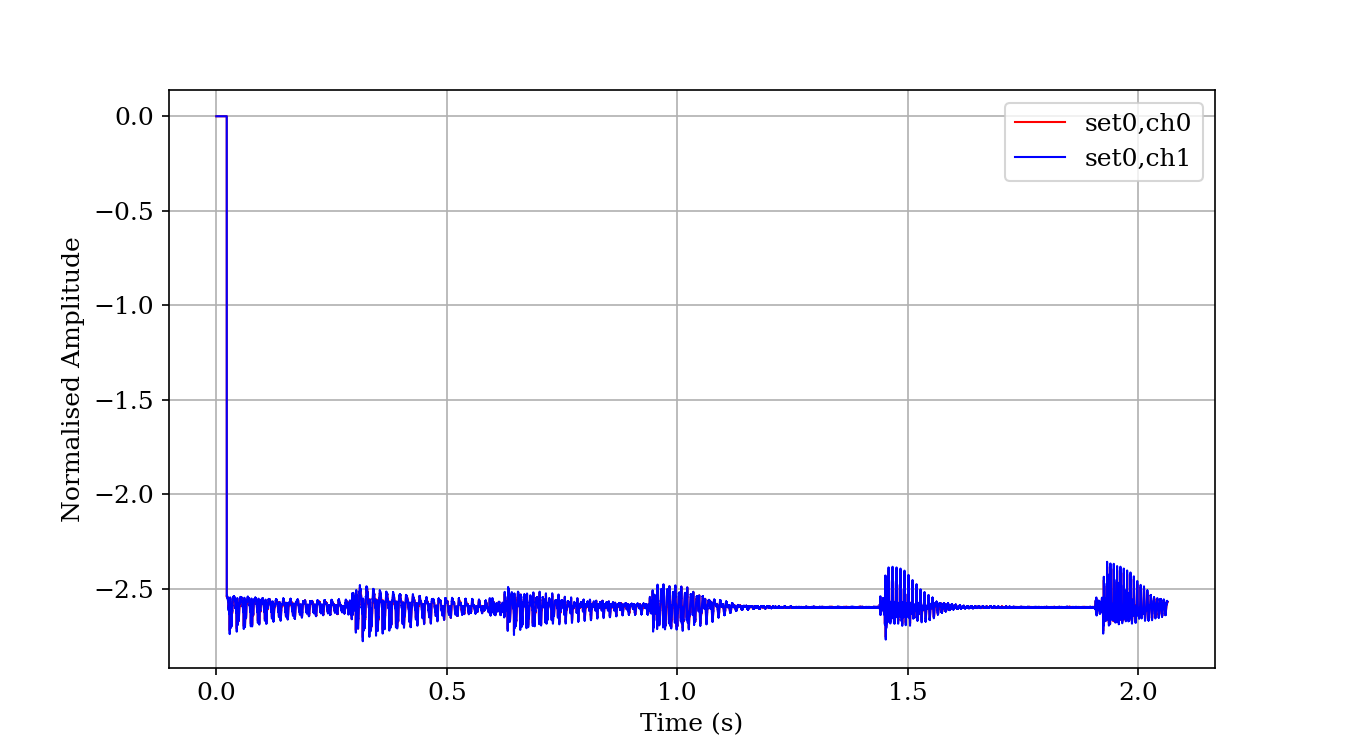

[0, 1]


In [16]:
%matplotlib notebook
timeplot = dvma.PlotData(dataset.time_data_list,channels='all')

**Use the box-zoom tool** to zoom in on the section of time where you can see an impact and its decay down to (nearly) zero. We will use this section of data to calculate its spectrum and find the resonant peaks of the beam.

In [ ]:
dataset.freqdata = dvma.convert_to_frequency(dataset.timedata, time_range=timeplot)
freqplot = dvma.PlotData(dataset.freqdata)